In [9]:
import librosa
import numpy as np
import pandas as pd
import librosa.display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
filetemp = pd.read_csv('Atraining_normal_seg.csv')

In [3]:
filetemp.head()

,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data , sampling_rate = librosa.load('E:\\心声项目\\Atraining_normal\\201101070538.wav')

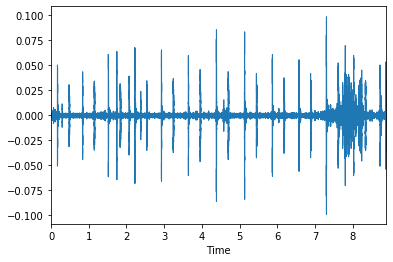

In [11]:
librosa.display.waveplot(data, sr = sampling_rate)

In [13]:
filetemp.shape

(21, 40)

In [14]:
data_x = []
data_y = []
for j in range (filetemp.shape[0]):
    for i in range(1,filetemp.shape[1]-1):
        try:
            data, sampling_rate = librosa.load('Atraining_normal/'+ filetemp.iloc[j, 0].split('.')[0] +'.wav', sr=44100 )
            temp_data = data[int(filetemp.iloc[j, i]):int(filetemp.iloc[j, i+1])]
            temp_label = filetemp.iloc[:, i].name.split('.')[0]
            
            data_x.append(temp_data)
            data_y.append(temp_label)
        except:
            pass

In [15]:
from keras.preprocessing.sequence import pad_sequences
data_x = pad_sequences(data_x, maxlen=20000, dtype='float', padding='post', truncating='post', value=0.)
data_x = data_x / np.max(data_x)

data_x = data_x[:,:,np.newaxis]
data_y = pd.Series(data_y)
data_y.value_counts()

data_y = data_y.map({'S1':0, 'S2':1}).values

Using TensorFlow backend.


In [25]:
from keras.layers import InputLayer , Conv1D , Dense , Flatten , MaxPool1D
from keras.models import Sequential

model = Sequential()
model.add(InputLayer(input_shape = data_x.shape[1:]))
model.add(Conv1D(filters = 50 ,kernel_size = 10 , activation = 'relu'))
model.add(MaxPool1D(strides = 8))
model.add(Conv1D(filters = 50 ,kernel_size = 10 , activation = 'relu'))
model.add(MaxPool1D(strides = 8))
model.add(Flatten())
model.add(Dense(units=1 ,activation='softmax'))

model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy' , metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 19991, 50)         550       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2499, 50)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 2490, 50)          25050     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 312, 50)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15601     
Total params: 41,201
Trainable params: 41,201
Non-trainable params: 0
__________________________________________________

In [27]:
model.fit(data_x , data_y , batch_size=32 , epochs=5)

Epoch 1/5
369/369 [==============================] - ETA: 4s - loss: 7.1875 - accuracy: 0.53 - ETA: 4s - loss: 6.7083 - accuracy: 0.56 - ETA: 3s - loss: 7.6666 - accuracy: 0.50 - ETA: 3s - loss: 7.5468 - accuracy: 0.50 - ETA: 2s - loss: 7.6666 - accuracy: 0.50 - ETA: 2s - loss: 7.9861 - accuracy: 0.47 - ETA: 2s - loss: 8.0089 - accuracy: 0.47 - ETA: 1s - loss: 7.9661 - accuracy: 0.48 - ETA: 1s - loss: 7.8796 - accuracy: 0.48 - ETA: 0s - loss: 8.0500 - accuracy: 0.47 - ETA: 0s - loss: 8.0151 - accuracy: 0.47 - 6s 15ms/step - loss: 8.0198 - accuracy: 0.4770
Epoch 2/5
369/369 [==============================] - ETA: 5s - loss: 9.5833 - accuracy: 0.37 - ETA: 4s - loss: 9.5833 - accuracy: 0.37 - ETA: 4s - loss: 8.6249 - accuracy: 0.43 - ETA: 3s - loss: 8.1458 - accuracy: 0.46 - ETA: 3s - loss: 7.3791 - accuracy: 0.51 - ETA: 2s - loss: 7.2673 - accuracy: 0.52 - ETA: 2s - loss: 7.5982 - accuracy: 0.50 - ETA: 1s - loss: 7.9062 - accuracy: 0.48 - ETA: 1s - loss: 8.1458 - accuracy: 0.46 - ETA: 0s